# Lymphocyte segmentation using logistic regression
Lymphocytes, a sub-type of white blood cells, are an important part of the immune system. Lymphocytic infiltration is the process by which the density of lymphocytes greatly increases at sites of disease or foreign bodies, indicating an immune response. A stronger immune response has been highly correlated to better outcomes in many forms of cancer, such as breast and ovarian.

Lymphocytes present with a blue tint from the absorption of hemotoxylin, their appearance similar in hue to nuclei, making them difficult to differentiate in some cases. Typically though, lymphocytes tend to be smaller, more chromatically dense, and circular.

## Logistic regression using pixel color values
The logistic regression model will the color information of a pixel to classify whether or not that pixel belongs to a lymphocyte. 

### Dataset creation
The original dataset contains images from various organs and xml files showing nuclear boundary annotations. With the masks generated from the xml files it is possible to separate the image into lymphocytes and non-lymphocytes.

In [2]:
from skimage.io import imread, imshow
import matplotlib.pyplot as plt

im_path = "MoNuSAC_images_and_annotations/TCGA-E2-A154-01Z-00-DX1/TCGA-E2-A154-01Z-00-DX1_1.tif"

# The images are loaded as rgba but the a layer does not contain any information
# Only the first 3 layers are thus needed
im = imread(im_path, plugin='pil')[:,:,:3]

mask_path = "MoNuSAC_masks/TCGA-E2-A154-01Z-00-DX1/TCGA-E2-A154-01Z-00-DX1_1/Lymphocyte/268_mask.png"
mask = imread(mask_path)

Text(0.5, 1.0, 'mask')

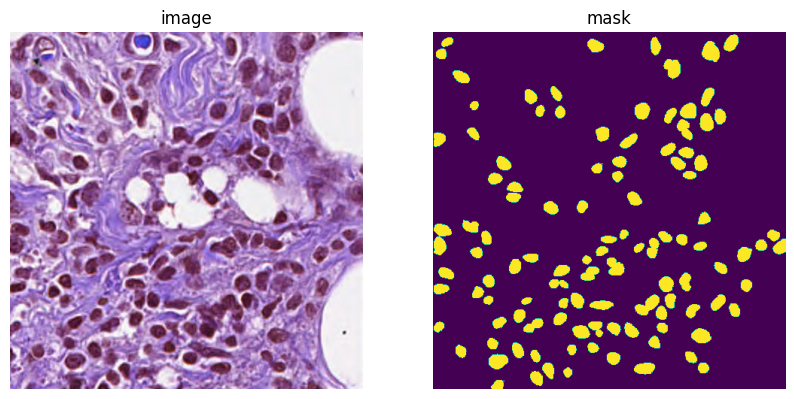

In [3]:
fig = plt.figure(figsize=(10,7))

rows = 1
cols = 2

fig.add_subplot(rows, cols, 1)
  
plt.imshow(im)
plt.axis('off')
plt.title("image")
  

fig.add_subplot(rows, cols, 2)


plt.imshow(mask)
plt.axis('off')
plt.title("mask")

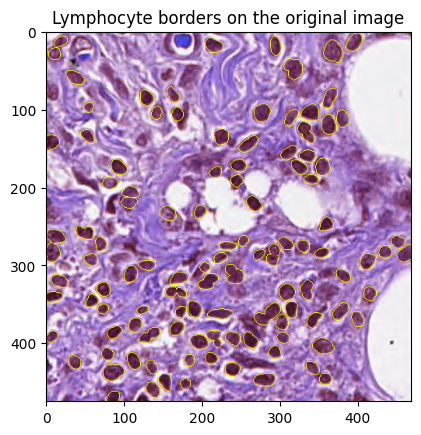

In [4]:
from skimage.segmentation import mark_boundaries

plt.figure()
plt.imshow(mark_boundaries(im, mask))
plt.title("Lymphocyte borders on the original image")
plt.show()

Lyphocyte and non-lymphocyte pixel color values are saved in dataframes to create a training set for the logistic regression model

In [12]:
import pandas as pd
import numpy as np

def mask_img2df(mask_path, im_path):
    """
    Save masked pixel color values and non-masked values in 2 different dataframes
    """
    mask = imread(mask_path)
    im = imread(im_path, plugin='pil')[:,:,:3]
    # Get index of masked pixels
    index = np.nonzero(mask)
    # Save rgb pixel values in a datafram
    masked_im = im[index]
    df1 = pd.DataFrame(masked_im, columns=['R', 'G', 'B'])
    
    # Get index of non-masked pixels
    index = np.nonzero(mask==0)
    # Save rgb pixel values in a datafram
    masked_im = im[index]
    df2 = pd.DataFrame(masked_im, columns=['R', 'G', 'B'])
    return(df1, df2)

def img2df(im_path):
    """
    Save all image pixel color values in a dataframe
    """
    im = imread(im_path, plugin='pil')[:,:,:3]
    
    r = im[:,:,0].flatten()
    g = im[:,:,1].flatten()
    b = im[:,:,2].flatten()
    df1 = pd.DataFrame({'R':r, 'G':g, 'B':b})
    
    return df1

In [16]:
import os
import pandas as pd

image_path = "C:/Users/vstef/Desktop/MA3/segmentation/MoNuSAC_images_and_annotations"
masks_path = "C:/Users/vstef/Desktop/MA3/segmentation/MoNuSAC_masks"

df_positive = pd.DataFrame(columns=['R', 'G', 'B']) # dataframe for Lymphocyte pixel values
df_negative = pd.DataFrame(columns=['R', 'G', 'B']) # dataframe for non-Lymphocyte pixel values

# We loop through all images to recover the pixel values and store them in dataframes
patients = os.listdir(masks_path)
for patient in patients:
    patient_folder_mask = masks_path + "/" + patient
    patient_folder = image_path + "/" + patient
    sub_images = os.listdir(patient_folder_mask)
    
    for sub_image in sub_images:
        mask_path = patient_folder_mask + "/" + sub_image + "/Lymphocyte"
        im_path = patient_folder+"/" + sub_image +".tif"
        
        try:
            mask = os.listdir(mask_path)
            # Save pixel color values in the corresponding dataframe
            if mask:
                mask_path = mask_path + "/" + mask[0]
                df1, df2 = mask_img2df(mask_path, im_path)
                df_positive = pd.concat([df_positive, df1])
                df_negative = pd.concat([df_negative, df2])
            else:
                df1 = img2df(im_path)
                df_negative = pd.concat([df_negative, df1])
        except FileNotFoundError:
            # 5 pictures have no Lymphocyte folder
            # For now, these pictures are ignored
            print("No Lymphocyte folder")

df_positive.to_csv('positive.csv')
df_negative.to_csv('negative.csv')

No Lymphocyte folder
No Lymphocyte folder
No Lymphocyte folder
No Lymphocyte folder
No Lymphocyte folder
